One Box Phosphate Cycle Model
=============================



## Notes:



-   This `Jupyter Notebook` contains text cells, and code cells.
-   You can edit the text cells using markdown syntax. Just double click this cell to try it out. When finished, press shift+enter.
-   You can execute the python code in each text cell by placing the cursor into a code-cell, and press shift+enter.
-   If you have more then one code cell, you need to execute them in sequential
    order since each cell depends on the output of the previous cell.



## Model structure



We use simple one box model, where the weathering of crustal rocks releases PO<sub>4</sub> that is then transported by rivers in to the ocean. The resulting evolution of the marine phosphate concentration can then be described as

\begin{equation}\label{}
\frac{d[PO_4]}{dt} = F_w(t) - F_b(t)
\end{equation}

where $[PO_4]$ denotes the phosphate concentration, $t$ denotes time, and $dt$ the change with time.

![img](./images/reservoir.png)

For this experiment we assume that F<sub>w</sub> is constant, and that F<sub>b</sub> is a given fraction of the phosphate concentration. So we can rewrite this equation as

\begin{equation}\label{}
\frac{d[PO4]}{dt} = F_w - c \times [PO4]
\end{equation}

where $c$ is a constant. In the following, we will use numerical integration to
solve this equation over a time span of 1Myrs.



## Model boundary conditions



Find the values for `F_r` , `V` in your obsidian notes, and edit the below code
accordingly. Then execute the code cell, and verify the values in the print out
before you continue. Note if your values are way off, the model will either not run, or run forever. So check that F<sub>r</sub> is between 1E3 and 2E3 mol/s, and that your ocean volume is between 1E18 and 2E18 m<sup>3</sup>. If in doubt check with instructor



In [5]:
"""
A simple P-cycle model, based on chpater 8 of Modeling Methods for the marine
sciences. P-export depends only on P-concentration.
"""
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

F_r =  1.33E3 * 2 # River (weathering) flux of PO4 mol/s
V = 1.36E18 # Volume of ocean [m^3]
C_0 = [0]  # initial P concentration in ocean
print(f"F_r = {F_r:.2e} mol/s, V = {V:.2e} m^3, C_0 = {C_0[0]:.2f} mol/m^3")

F_r = 2.66e+03 mol/s, V = 1.36e+18 m^3, C_0 = 0.00 mol/m^3


## Execute the model



Run the below code and you should see a graph describing how the marine PO<sub>4</sub> concentration changes with time.



Final PO4 concentration [0.0379427] [mol/m^3]


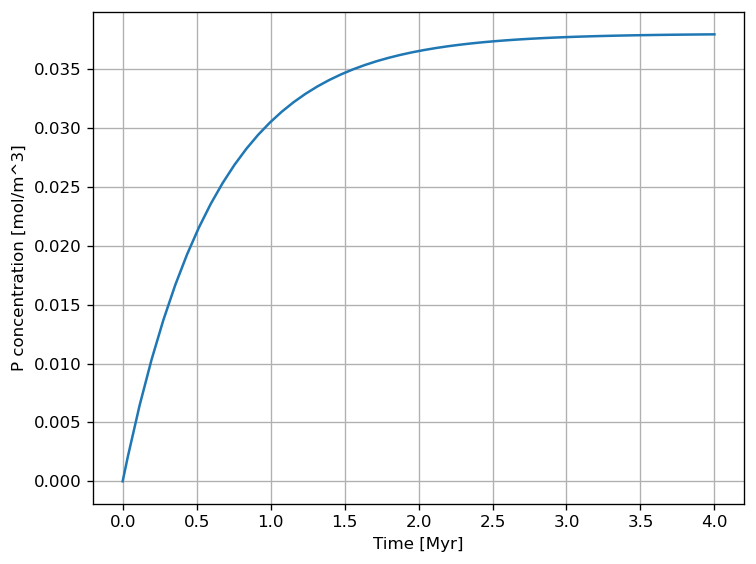

In [6]:
# some misc defintions
C_0 = [0]  # initial P concentration in ocean
time = 4e6  # model run time in years
year_to_seconds = 60 * 60 * 24 * 365.2425  # yr to s 
t_span = (0, time * year_to_seconds)  # 
p = (V, F_r)  # function arguments

def dCdt(t, C_0, V, F_r):
    """Calculate the change in concentration as function of time

    :param t: array, not used but must be present
    :param C: initial conditions (concentrations)
    :params V: Volume of ocean [m^3]
    :param F_r: River (weathering) flux of PO4 mol/s
    :returns: Change in Concentration
    """

    C = C_0[0]
    F_b = C * 7E4  # determine burial flux
    dCdt = (F_r - F_b) / V  # dC/dt ocean

    return dCdt

# integrate dC/dt
result = solve_ivp(dCdt, t_span, C_0, args=p, max_step=t_span[1] / 50)
t = result.t / year_to_seconds / 1e6  # time in Myr
C = result.y.T  # concentration in mol/m^3
print(f"Final PO4 concentration {C[-1]} [mol/m^3]")

# plot data
fig, ax = plt.subplots()
ax.plot(t, C)
ax.set_xlabel("Time [Myr]")
ax.set_ylabel("P concentration [mol/m^3]")
fig.tight_layout()
ax.grid()
plt.show()

Now lets do some sanity checks. Your total phosphate mass should be about
2.85e+16 mol, and your residence time should be around 601 kyrs. If not, there
is a mistake in the boundary conditions.

